In [5]:
import pandas as pd
import numpy as np

# Step 1: Data Loading 


In [6]:
customer_acquisition = pd.read_csv(r"Customer_Acqusition.csv") 
spend_data = pd.read_csv(r"spend.csv") 
repayment_data = pd.read_csv(r"Repayment.csv")  



In [11]:
customer_acquisition

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [8]:
spend_data

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [9]:
repayment_data

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


# 1. Data Preprocessing

In [13]:

# a.
customer_acquisition['Age'] = customer_acquisition['Age'].apply(lambda x: np.mean(customer_acquisition['Age'])
    if pd.notna(x)
    and x < 18 else x)
customer_acquisition['Age']

0     76.0
1     71.0
2     34.0
3     47.0
4     56.0
      ... 
95    54.0
96    58.0
97    51.0
98    35.0
99    36.0
Name: Age, Length: 100, dtype: float64

In [12]:
print(customer_acquisition.head())


   No Customer   Age       City   Product     Limit Company        Segment
0   1       A1  76.0  BANGALORE      Gold  500000.0      C1  Self Employed
1   2       A2  71.0   CALCUTTA    Silver  100000.0      C2   Salaried_MNC
2   3       A3  34.0     COCHIN  Platimum   10000.0      C3   Salaried_Pvt
3   4       A4  47.0     BOMBAY  Platimum   10001.0      C4           Govt
4   5       A5  56.0  BANGALORE  Platimum   10002.0      C5  Normal Salary


In [15]:
# b.In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
#(customer’s limit provided in acquisition table is the per transaction limit on his card)

# b. Adjust spend amount if it exceeds the limit
for index, row in spend_data.iterrows():
    customer_id = row['Customer']  # Check and replace 'Customer_ID' with your actual column name
    limit = customer_acquisition[customer_acquisition['Customer'] == customer_id]['Limit'].values[0]
    if row['Amount'] > limit:
        spend_data.loc[index, 'Amount'] = 0.5 * limit



In [16]:
print(spend_data.head())


   Sl No: Customer      Month       Type     Amount
0       1       A1  12-Jan-04  JEWELLERY  485470.80
1       2       A1   3-Jan-04      PETRO  410556.13
2       3       A1  15-Jan-04    CLOTHES   23740.46
3       4       A1  25-Jan-04       FOOD  484342.47
4       5       A1  17-Jan-05     CAMERA  369694.07


In [200]:
#1c.c. Incase the repayment amount is more than the limit, replace the repayment with the limit.
# Merge the 'Limit' information from the customer acquisition data to the repayment data
repayment_data = repayment_data.merge(customer_acquisition[['Customer', 'Limit']], on='Customer', how='left')

# Replace repayment amount more than the limit with the limit
repayment_data.loc[repayment_data['Amount'] > repayment_data['Limit'], 'Amount'] = repayment_data['Limit']

# Drop any unnecessary columns after the operation
repayment_data.drop(['Unnamed: 4'], axis=1, inplace=True)

# Display the updated repayment_data
print(repayment_data)



      SL No: Customer      Month     Amount     Limit
0        NaN       A1  12-Jan-04  495414.75  500000.0
1        2.0       A1   3-Jan-04  245899.02  500000.0
2        3.0       A1  15-Jan-04  259490.06  500000.0
3        4.0       A1  25-Jan-04  437555.12  500000.0
4        5.0       A1  17-Jan-05  165972.88  500000.0
...      ...      ...        ...        ...       ...
1518     NaN      NaN        NaN        NaN       NaN
1519     NaN      NaN        NaN        NaN       NaN
1520     NaN      NaN        NaN        NaN       NaN
1521     NaN      NaN        NaN        NaN       NaN
1522     NaN      NaN        NaN        NaN       NaN

[1523 rows x 5 columns]


In [17]:
repayment_data


,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN


# Step 2: Summary

In [19]:
# 2a. Count distinct customers
distinct_customers = customer_acquisition['Customer'].nunique()



In [20]:
distinct_customers

100

In [21]:
# 2b. Count distinct categories
distinct_categories = spend_data['Type'].nunique()
distinct_categories

15

In [22]:
# 2c. Calculate average monthly spend by customers
average_monthly_spend = spend_data.groupby('Customer')['Amount'].mean()
average_monthly_spend

Customer
A1      285705.708889
A10     213745.813889
A100     50000.000000
A11     250957.093889
A12     263969.375484
            ...      
A95     240401.500000
A96      54729.660000
A97       5000.000000
A98       5000.500000
A99       5001.000000
Name: Amount, Length: 100, dtype: float64

In [23]:
# 2d. Calculate average monthly repayment by customers
average_monthly_repayment = repayment_data.groupby('Customer')['Amount'].mean()
average_monthly_repayment

Customer
A1      264093.981667
A10     205313.751111
A100     69551.190000
A11     295051.890556
A12     268863.230968
            ...      
A95     369405.960000
A96     310992.300000
A97     121874.900000
A98     337815.570000
A99      25682.730000
Name: Amount, Length: 100, dtype: float64

In [24]:
# 2e. Calculate monthly profit for the bank
monthly_profit = average_monthly_repayment - average_monthly_spend
monthly_profit[monthly_profit < 0] = 0
monthly_interest_rate = 0.029            # 2.9% monthly interest rate

monthly_interest_earned = monthly_profit * monthly_interest_rate

print(monthly_interest_earned)

Customer
A1         0.000000
A10        0.000000
A100     566.984510
A11     1278.749103
A12      141.921809
           ...     
A95     3741.129340
A96     7431.616560
A97     3389.372100
A98     9651.637030
A99      599.770170
Name: Amount, Length: 100, dtype: float64


In [25]:

# 2f. Find top 5 product types
top_5_products = spend_data['Type'].value_counts().head()
top_5_products

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

In [26]:
# 2g. Find the city with maximum spend
city_max_spend = customer_acquisition.groupby('City')['Limit'].sum().idxmax()
city_max_spend


'COCHIN'

In [27]:
# 2h. Find the age group that spends the most
age_group_spending = pd.cut(customer_acquisition['Age'], bins=[18, 30, 40, 50, 60, 70, np.inf],
labels=['18-30', '30-40', '40-50', '50-60', '60-70', '70+'])
age_group_spending = age_group_spending.value_counts().idxmax()
age_group_spending 

'30-40'

In [28]:
# 2i. Find the top 10 customers in terms of repayment
top_10_customers_repayment = repayment_data.groupby('Customer')['Amount'].sum().nlargest(10)
top_10_customers_repayment

Customer
A61    10539142.91
A60     9876290.74
A13     9572000.66
A22     9372561.68
A21     9056336.15
A43     8489871.46
A45     8448334.87
A12     8334760.16
A48     8292416.75
A14     7943268.63
Name: Amount, dtype: float64

# Step 3.Calculate the city wise spend on each product on yearly basis. 
Calculate the city wise spend on each product on yearly basis. 
Also include a graphical representation for the same.


In [211]:

# Merge the spend_data with the customer_acquisition data based on the common column 'Customer'
merged_data = spend_data.merge(customer_acquisition, on='Customer', how='left')

merged_data


,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,3-Jan-04,PETRO,410556.13,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,15-Jan-04,CLOTHES,23740.46,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
3,4,A1,25-Jan-04,FOOD,484342.47,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
4,5,A1,17-Jan-05,CAMERA,369694.07,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73,67,54,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10,68,12,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44,69,33,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94,70,16,BOMBAY,Platimum,10001.0,C32,Self Employed


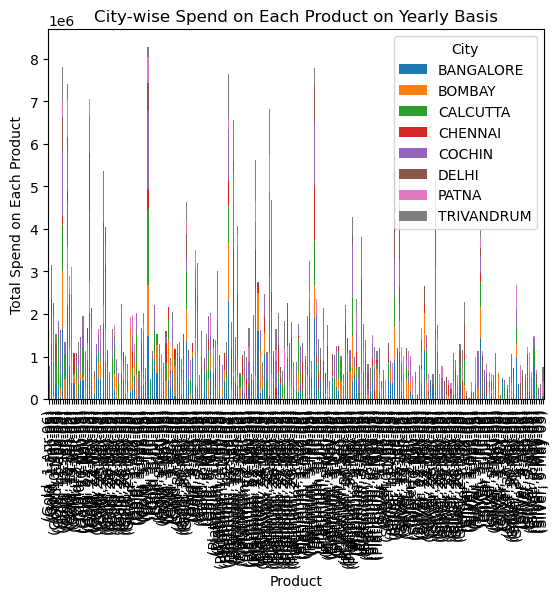

In [212]:
# Check if 'Product' and 'City' columns exist in the merged DataFrame
if 'Product' in merged_data.columns and 'City' in merged_data.columns:
    # Group the merged_data by 'City', 'Product', and 'Month' to find the total spend on each product for each city for each month
    yearly_spend_city_product = merged_data.groupby(['City', 'Product', 'Month'])['Amount'].sum().unstack('City').fillna(0)

    # Plotting the data
    yearly_spend_city_product.plot(kind='bar', stacked=True)
    plt.xlabel('Product')
    plt.ylabel('Total Spend on Each Product')
    plt.title('City-wise Spend on Each Product on Yearly Basis')
    plt.show()
else:
    print("Product or City column not found in the DataFrame.")

# 4. Create Graphs



In [213]:

#a. Monthly comparison of total spends, city wise

customer_acquisition = pd.DataFrame({
    'Customer': [1, 2, 3, 4, 5],
    'City': ['City_A', 'City_B', 'City_A', 'City_B', 'City_A']
})

spend_data = pd.DataFrame({
    'Month': ['Jan', 'Feb', 'Mar', 'Jan', 'Feb', 'Mar'],
    'Amount': [1000, 1500, 1200, 900, 1400, 1100],
    'Customer': [1, 2, 3, 4, 5, 1]
})


In [214]:
customer_acquisition

,Customer,City
0,1,City_A
1,2,City_B
2,3,City_A
3,4,City_B
4,5,City_A


In [215]:
spend_data 

,Month,Amount,Customer
0,Jan,1000,1
1,Feb,1500,2
2,Mar,1200,3
3,Jan,900,4
4,Feb,1400,5
5,Mar,1100,1


In [216]:
# Merge the datasets on 'Customer'
merged_data = pd.merge(spend_data, customer_acquisition, on='Customer', how='left')


In [217]:
merged_data

,Month,Amount,Customer,City
0,Jan,1000,1,City_A
1,Feb,1500,2,City_B
2,Mar,1200,3,City_A
3,Jan,900,4,City_B
4,Feb,1400,5,City_A
5,Mar,1100,1,City_A


In [218]:
# Convert 'Month' to numeric values

merged_data['Month'] = pd.to_datetime(merged_data['Month'], format='%b').dt.month


In [219]:
merged_data['Month']

0    1
1    2
2    3
3    1
4    2
5    3
Name: Month, dtype: int64

In [220]:
# Monthly comparison of total spends, city wise
monthly_comparison_spend_city = merged_data.groupby(['Month', 'City'])['Amount'].sum().unstack()


In [221]:
monthly_comparison_spend_city

City,City_A,City_B
Month,,
1,1000.0,900.0
2,1400.0,1500.0
3,2300.0,NaN


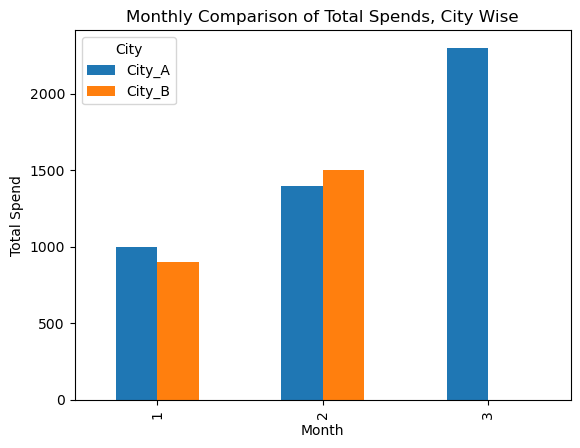

In [222]:
# Create a bar plot
monthly_comparison_spend_city.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.title('Monthly Comparison of Total Spends, City Wise')
plt.show()

# b. Comparison of yearly spend on air tickets.



In [285]:
spend_data

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


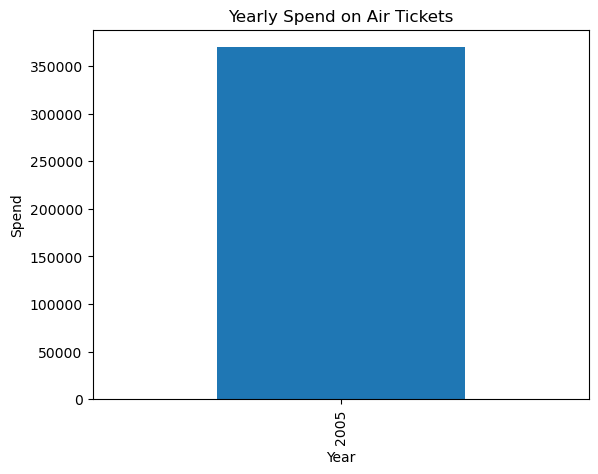

In [288]:
spend_data = {
    'Sl No': [0, 1, 2, 3, 4],
    'Customer': ['A1', 'A1', 'A1', 'A1', 'A1'],
    'Month': ['12-Jan-04', '3-Jan-04', '15-Jan-04', '25-Jan-04', '17-Jan-05'],
    'Type': ['JEWELLERY', 'PETRO', 'CLOTHES', 'FOOD', 'AIR TICKET'],
    'Amount': [485470.80, 410556.13, 23740.46, 484342.47, 369694.07]
}

# Creating a DataFrame
spend_data = pd.DataFrame(data)

# Convert 'Month' to datetime format
spend_data['Month'] = pd.to_datetime(spend_data['Month'])

# Filter data for 'AIR TICKET' type, group by year, and sum the amounts
yearly_spend_air_tickets = spend_data[spend_data['Type'] == 'AIR TICKET'].groupby(spend_data['Month'].dt.year)['Amount'].sum()

# Plot the graph
yearly_spend_air_tickets.plot(kind='bar')
plt.title('Yearly Spend on Air Tickets')
plt.xlabel('Year')
plt.ylabel('Spend')
plt.show()

In [276]:
#c. c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)



In [284]:
# Perform the merge operation based on the common column 'Customer'
merged_data = spend_data.merge(customer_acquisition, on='Customer', how='left')
merged_data

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,3-Jan-04,PETRO,410556.13,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,15-Jan-04,CLOTHES,23740.46,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
3,4,A1,25-Jan-04,FOOD,484342.47,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
4,5,A1,17-Jan-05,CAMERA,369694.07,1,76,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73,67,54,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10,68,12,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44,69,33,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94,70,16,BOMBAY,Platimum,10001.0,C32,Self Employed


In [290]:

# To access all column names
column_names = merged_data.columns
print(column_names)

Index(['Sl No', 'Customer', 'Month', 'Type', 'Amount'], dtype='object')


In [296]:
# Access all column names with their corresponding values
for col in spend_data.columns:
    print(f"Column: {col}")
    for idx, value in enumerate(spend_data[col]):
        print(f"    Row {idx}: {value}")
    print()

Column: Sl No
    Row 0: 0
    Row 1: 1
    Row 2: 2
    Row 3: 3
    Row 4: 4

Column: Customer
    Row 0: A1
    Row 1: A1
    Row 2: A1
    Row 3: A1
    Row 4: A1

Column: Month
    Row 0: 2004-01-12 00:00:00
    Row 1: 2004-01-03 00:00:00
    Row 2: 2004-01-15 00:00:00
    Row 3: 2004-01-25 00:00:00
    Row 4: 2005-01-17 00:00:00

Column: Type
    Row 0: JEWELLERY
    Row 1: PETRO
    Row 2: CLOTHES
    Row 3: FOOD
    Row 4: AIR TICKET

Column: Amount
    Row 0: 485470.8
    Row 1: 410556.13
    Row 2: 23740.46
    Row 3: 484342.47
    Row 4: 369694.07



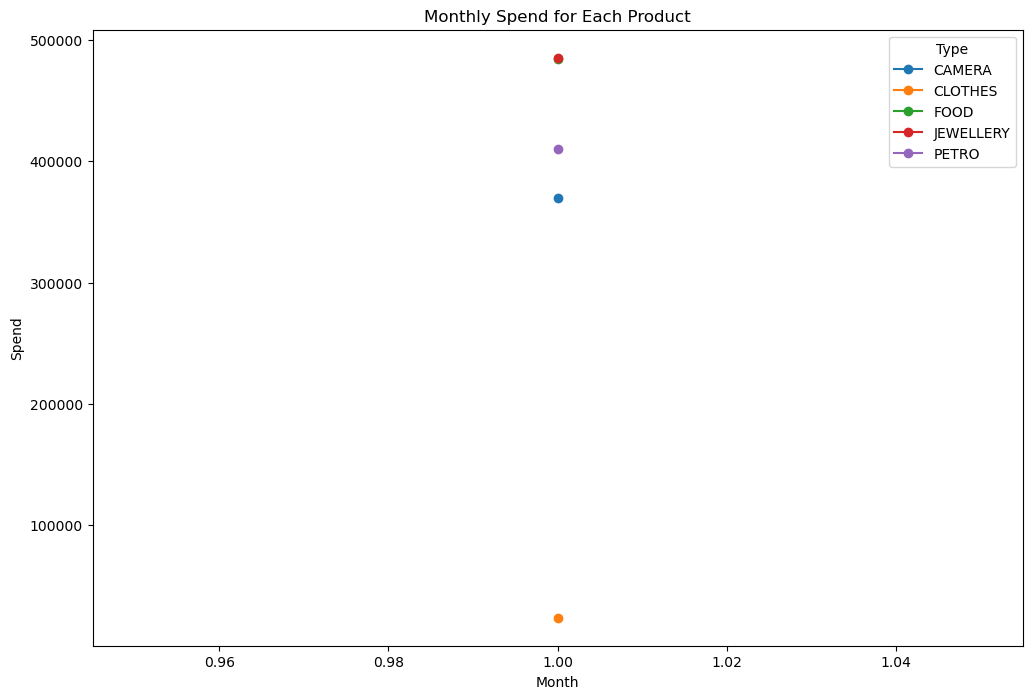

In [289]:

# Sample data for demonstration
merged_data = {
    'Sl No': [0, 1, 2, 3, 4],
    'Customer': ['A1', 'A1', 'A1', 'A1', 'A1'],
    'Month': ['12-Jan-04', '3-Jan-04', '15-Jan-04', '25-Jan-04', '17-Jan-05'],
    'Type': ['JEWELLERY', 'PETRO', 'CLOTHES', 'FOOD', 'CAMERA'],
    'Amount': [485470.80, 410556.13, 23740.46, 484342.47, 369694.07]
}

# Creating a DataFrame
merged_data = pd.DataFrame(merged_data)

# Convert 'Month' to datetime format
merged_data['Month'] = pd.to_datetime(merged_data['Month'])

# Group by month and product and calculate the sum of amounts
monthly_spend_product = merged_data.groupby([merged_data['Month'].dt.month, 'Type'])['Amount'].sum().unstack()

# Plot the graph
monthly_spend_product.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Monthly Spend for Each Product')
plt.xlabel('Month')
plt.ylabel('Spend')
plt.show()

#5. Write user defined PYTHON function to perform the following analysis:
#You need to find top 10 customers for each city in terms of their repayment amount by 
#different products and by different time periods i.e. year or month. The user should be able 
#to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
#function should automatically take these inputs while identifying the top 10 customers.


In [324]:

# Write user-defined Python function for analysis
def top_10_customers_by_criteria(spend_data, customer_acquisition, Type, time_period):
    merged_data = spend_data.merge(customer_acquisition[['Customer', 'City']], on='Customer', how='left')
    
    if time_period == 'yearly':
        merged_data['Year'] = pd.to_datetime(merged_data['Month']).dt.year
        aggregated_data = merged_data.groupby(['City', 'Customer', 'Type', 'Year'])['Amount'].sum().reset_index()
    elif time_period == 'monthly':
        merged_data['Month'] = pd.to_datetime(merged_data['Month']).dt.month
        aggregated_data = merged_data.groupby(['City', 'Customer', 'Type', 'Month'])['Amount'].sum().reset_index()

    top_10 = aggregated_data[aggregated_data['Type'] == Type].groupby('City', group_keys=False).apply(lambda x: x.nlargest(10, 'Amount'))
    return top_10

# Example usage
top_10_customers_result = top_10_customers_by_criteria(spend_data, customer_acquisition, 'Gold', 'yearly')
print("Top 10 customers for Gold product on a yearly basis:", top_10_customers_result)


Top 10 customers for Gold product on a yearly basis: Empty DataFrame
Columns: [City, Customer, Type, Year, Amount]
Index: []


In [321]:
print(top_10_customers_result)


Empty DataFrame
Columns: [City, Customer, Type, Year, Amount]
Index: []


In [322]:
print(spend_data['Type'].unique())
print(spend_data['Year'].unique())


['JEWELLERY' 'PETRO' 'CLOTHES' 'FOOD' 'AIR TICKET']
[2004 2005]
